# Introduction

1. Importing libraries 

2. Loading and Data Insights

3. Data visualization

4. Data Pre_Processing 

    4.1 Outlier detection and removal

    4.2 Normalization

5. Model

    5.1  Model training

    5.2  Visualization


# Importing Libraries 

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import sklearn as sk
from sklearn.preprocessing import LabelEncoder , StandardScaler , normalize , MinMaxScaler
from  sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Data Loading and Insights

In [51]:
data_dir = "/kaggle/input/cust_segm/Train.csv"

In [52]:
data = pd.read_csv(data_dir)

In [53]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8068.0,NaN,NaN,NaN,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Gender,8068,2,Male,4417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7928,2,Yes,4643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8068.0,NaN,NaN,NaN,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Graduated,7990,2,Yes,4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7944,9,Artist,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7239.0,NaN,NaN,NaN,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Spending_Score,8068,3,Low,4878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7733.0,NaN,NaN,NaN,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0
Var_1,7992,7,Cat_6,5238,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8068 entries, 0 to 8067

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   ID               8068 non-null   int64  

 1   Gender           8068 non-null   object 

 2   Ever_Married     7928 non-null   object 

 3   Age              8068 non-null   int64  

 4   Graduated        7990 non-null   object 

 5   Profession       7944 non-null   object 

 6   Work_Experience  7239 non-null   float64

 7   Spending_Score   8068 non-null   object 

 8   Family_Size      7733 non-null   float64

 9   Var_1            7992 non-null   object 

 10  Segmentation     8068 non-null   object 

dtypes: float64(2), int64(2), object(7)

memory usage: 693.5+ KB


In [55]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [56]:
data = data.drop(columns=['Var_1', 'Segmentation'])

In [57]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [58]:
data = data.dropna()

In [59]:
data.duplicated().sum()

0

In [60]:
cat_feat = data.select_dtypes(include='object').columns
con_feat = data.drop(cat_feat , axis=1).columns

In [61]:
print(cat_feat)
print(con_feat)

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], dtype='object')

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


In [62]:
data['Age'].unique().size

67

In [63]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

# Data Visualization

## Label Encoding features for checking corelation

In [64]:
label_encode = LabelEncoder()
to_encode = ['Ever_Married', 'Graduated', 'Profession','Spending_Score']
for i in to_encode:
    data[i] = label_encode.fit_transform(data[i])
    label_mapping = {label: value for value, label in enumerate(label_encode.classes_)}
    print(label_mapping)

{'No': 0, 'Yes': 1}

{'No': 0, 'Yes': 1}

{'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8}

{'Average': 0, 'High': 1, 'Low': 2}


In [65]:
d = data.copy()
d.drop(columns=['Gender','ID'], axis=1, inplace=True)

<Axes: >

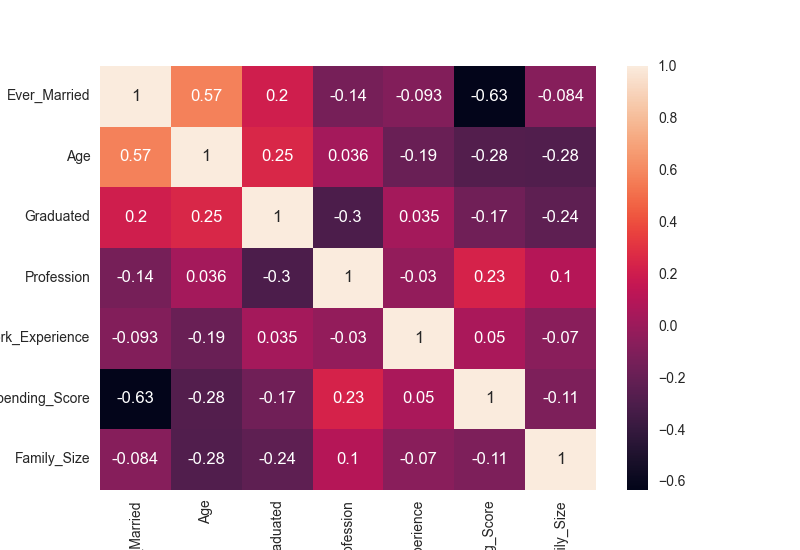

In [66]:
sns.heatmap(d.corr() , annot=True )

Since we can observe from the corelation matrix that Ever_Married is highly co related with Spending_Score and Age , We can remove that column.

In [67]:
sns.countplot(x='Gender',hue='Spending_Score', data=data)

<Axes: xlabel='Gender', ylabel='count'>

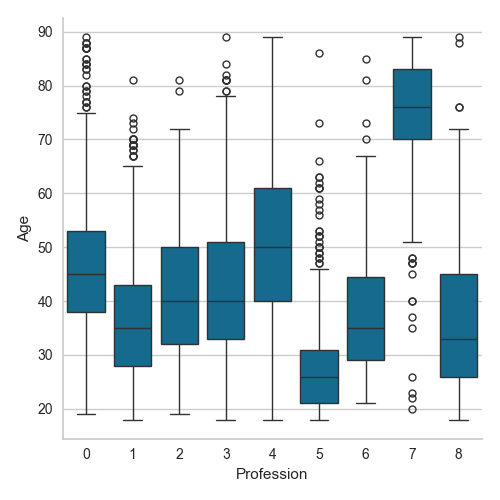

In [68]:
sns.catplot(x='Profession', y='Age', data=data, kind='box')

In [69]:
# Creating and feature vector we will be visualizing and training our model on.
X = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score' , 'Graduated', 'Profession']

In [70]:
sns.heatmap(data[X].corr() , annot=True )

<Axes: >

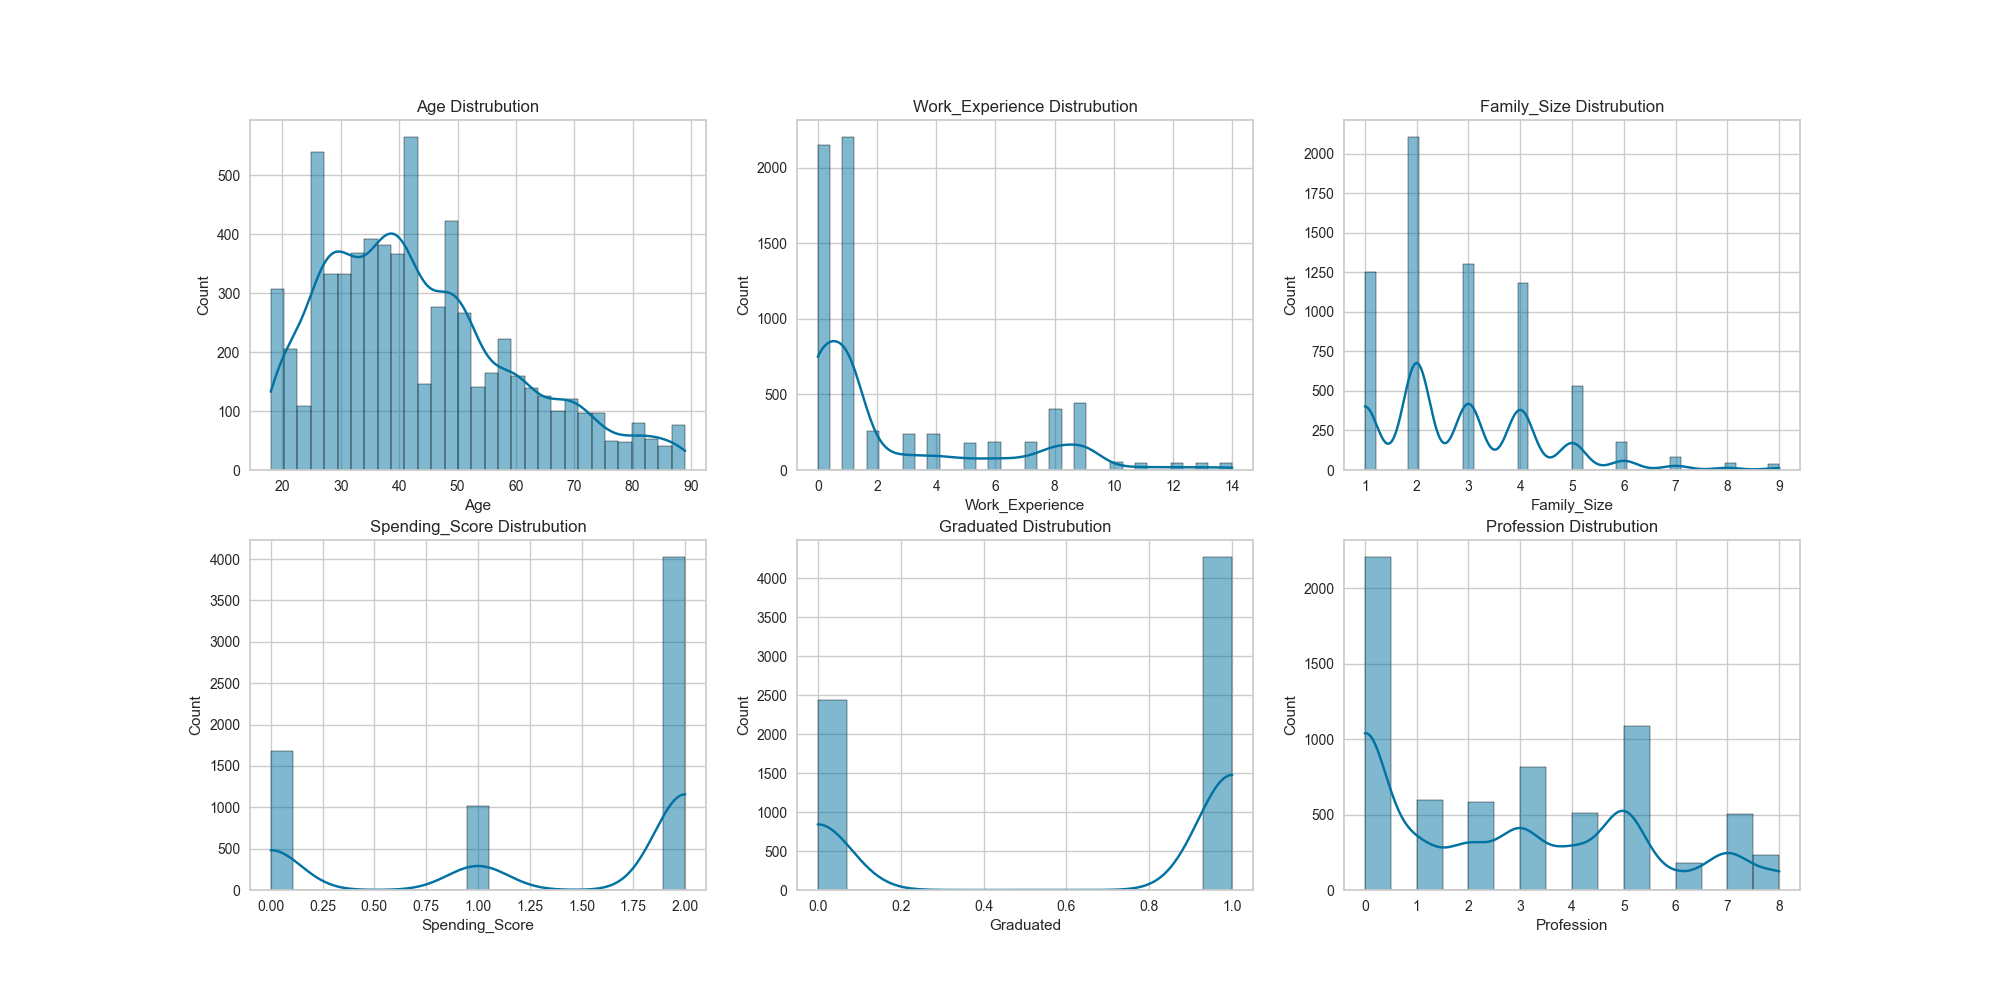

In [71]:
fig , axes = plt.subplots(2,3,figsize=(20,10))
for i, feat in enumerate(X):
    row,col = divmod(i,3)
    sns.histplot(data[feat], kde=True, ax=axes[row,col])
    axes[row,col].set_title(f"{feat} Distrubution")
plt.show()

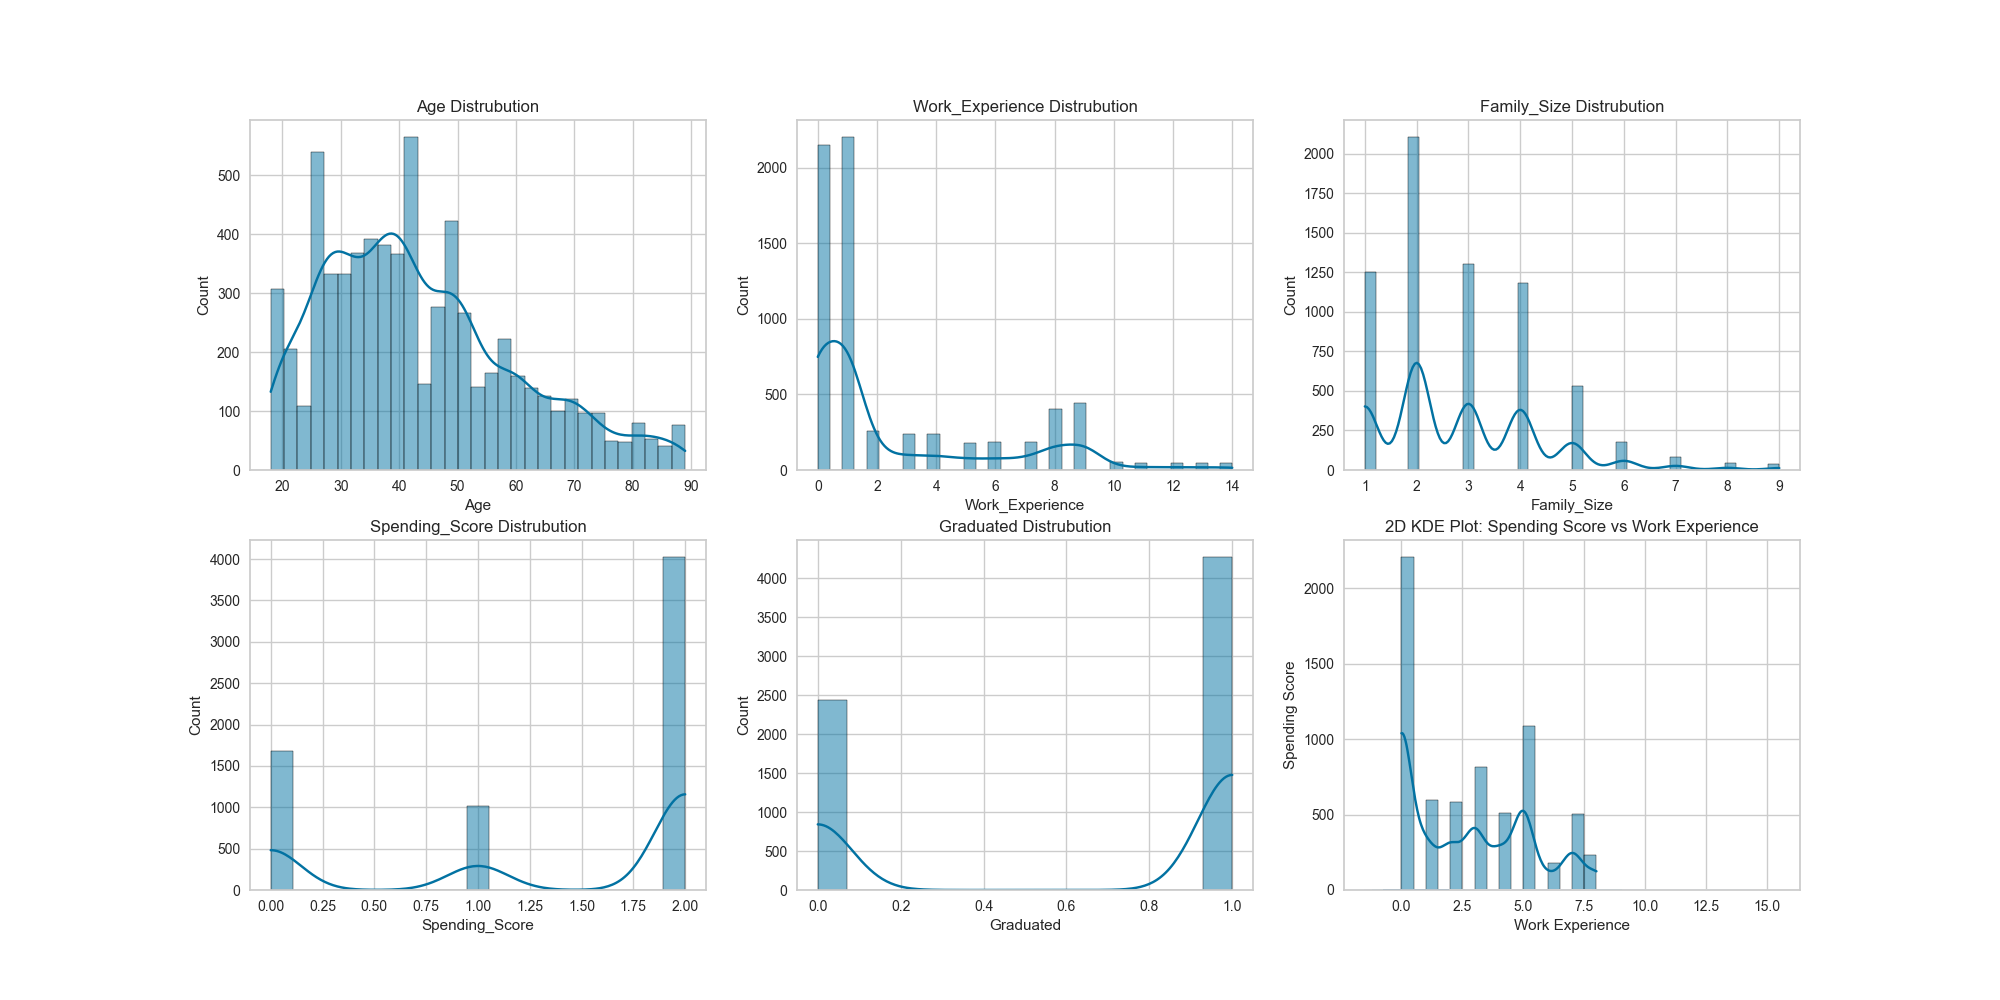

In [72]:
sns.kdeplot(x='Work_Experience', y='Spending_Score', data=data, fill=True, cmap="Blues", levels=5)
plt.title('2D KDE Plot: Spending Score vs Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Spending Score')
plt.show()

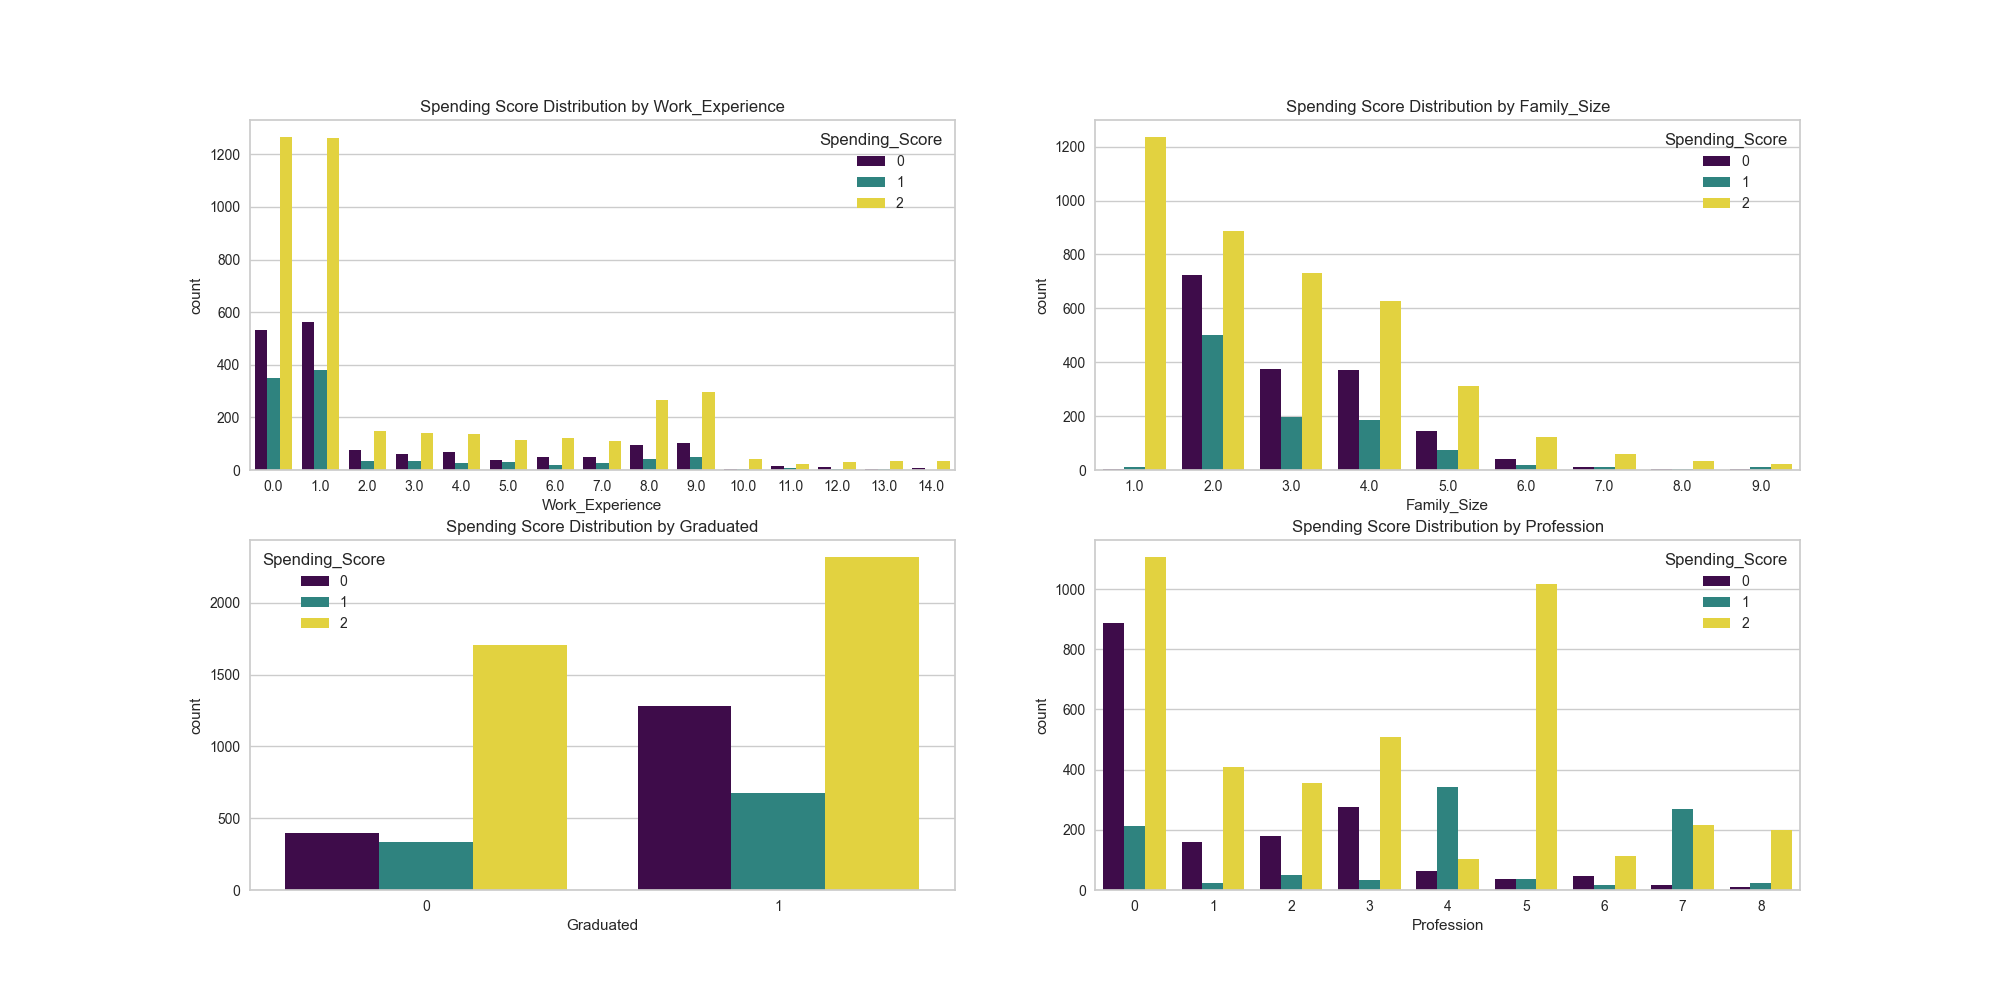

In [73]:
fig , axes = plt.subplots(2,2,figsize=(20,10))
y = X.copy()
y.remove("Age")
y.remove("Spending_Score")
for i, feat in enumerate(y):
    row,col = divmod(i,2)
    sns.countplot(x=feat, hue='Spending_Score', data=data, palette='viridis' , ax=axes[row,col])
    axes[row,col].set_title(f'Spending Score Distribution by {feat}')
    # axes[row,col].xlabel(feat)
    # axes[row,col].ylabel('Count')
plt.show()

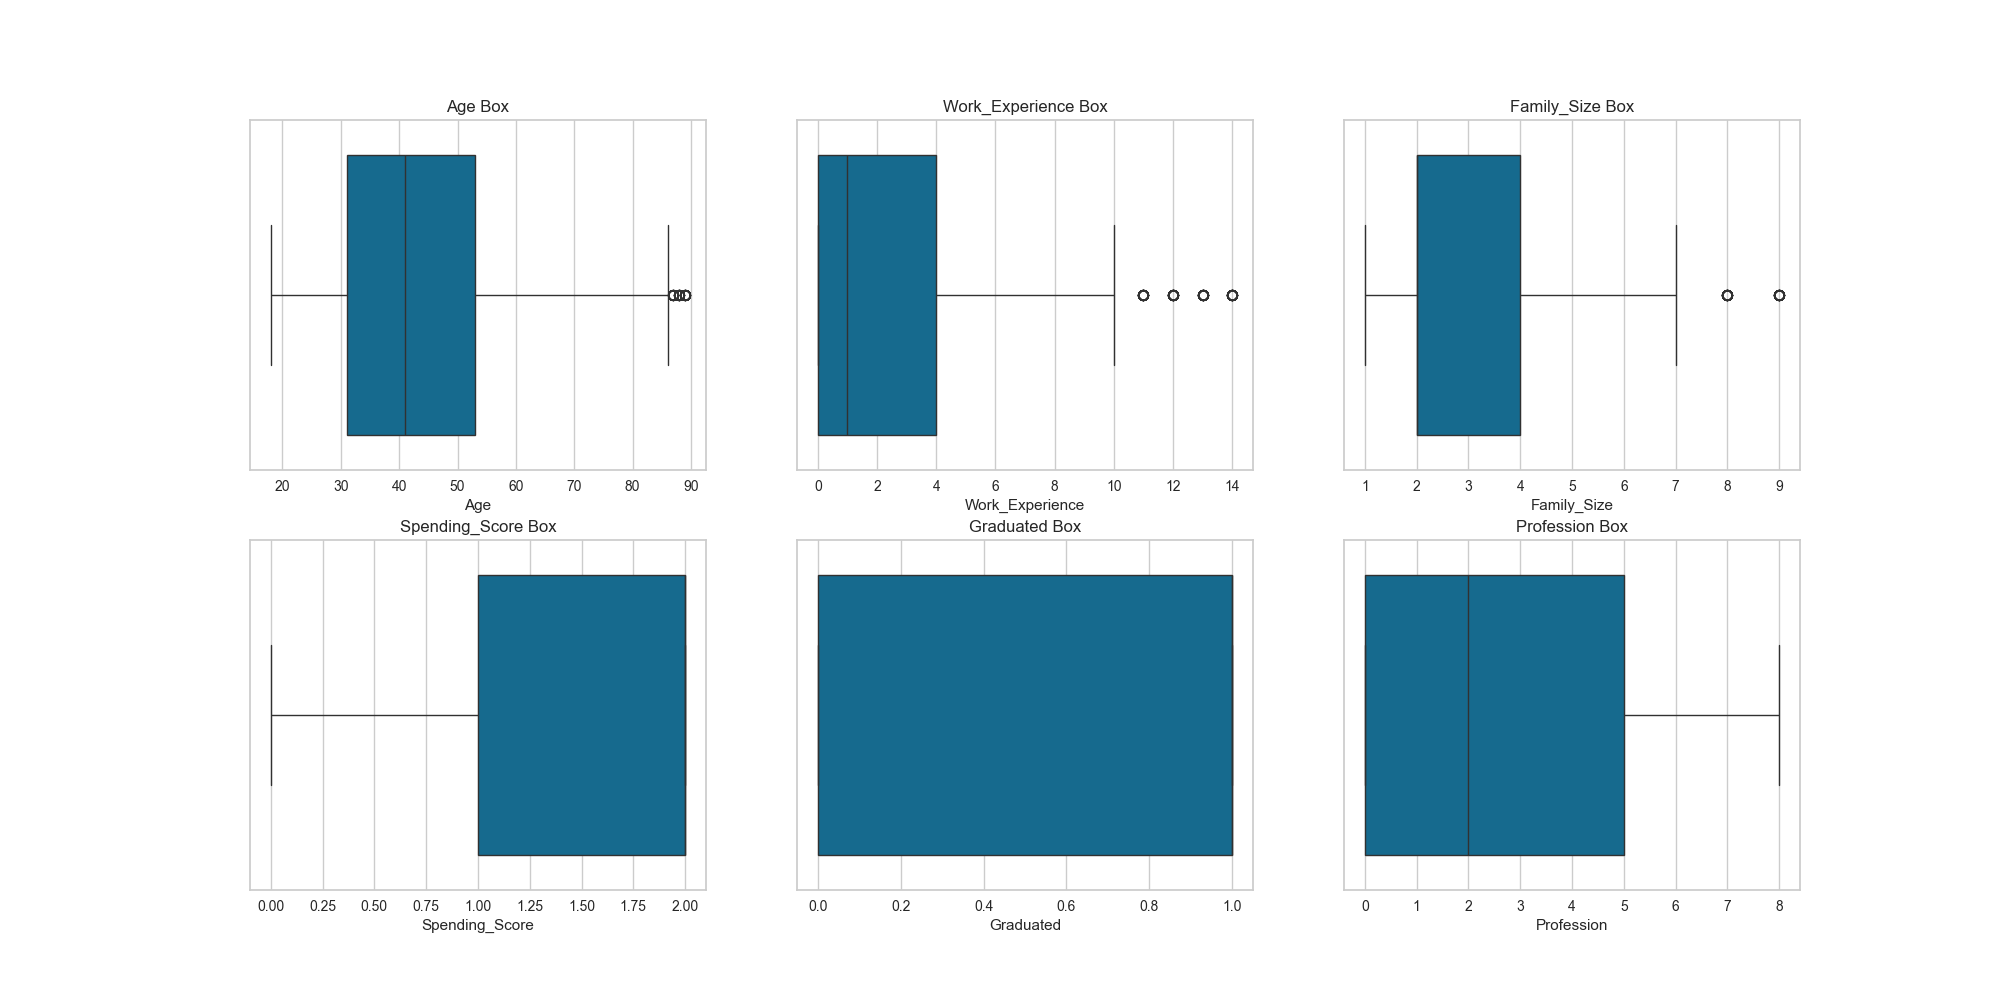

In [74]:
fig , axes = plt.subplots(2,3,figsize=(20,10))
for i, feat in enumerate(X):
    row,col = divmod(i,3)
    sns.boxplot(x=data[feat], ax=axes[row,col])
    axes[row,col].set_title(f"{feat} Box")
plt.show()

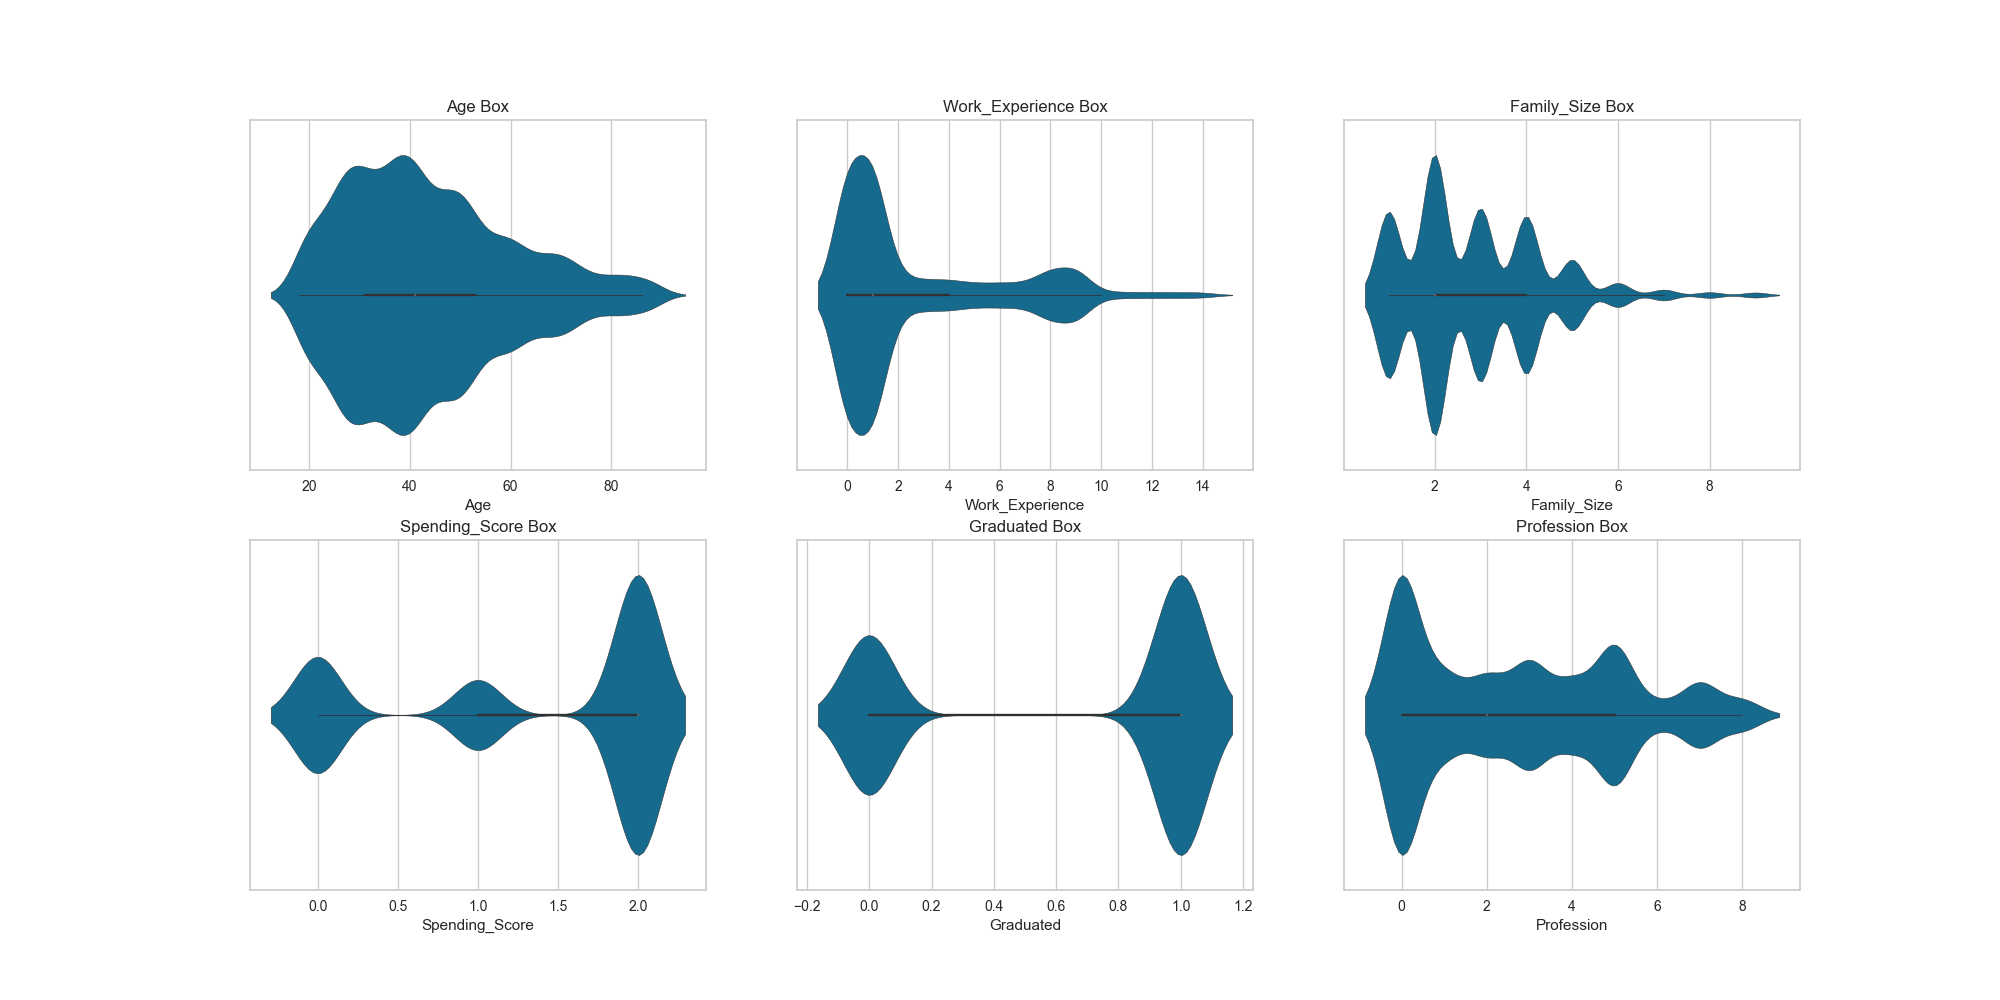

In [75]:
fig , axes = plt.subplots(2,3,figsize=(20,10))
for i, feat in enumerate(X):
    row,col = divmod(i,3)
    sns.violinplot(x=data[feat], ax=axes[row,col])
    axes[row,col].set_title(f"{feat} Box")
plt.show()

In [76]:
sns.scatterplot(x='Work_Experience', y='Family_Size', data=data)


<Axes: title={'center': 'Profession Box'}, xlabel='Profession', ylabel='Family_Size'>

## WoW  Isnt it beautiful 😄

# Data Pre_Processing

## Outlier Removal Using Interquartile Range (IQR) Method

Outliers are extreme values that can distort statistical analyses and machine learning models. The Interquartile Range (IQR) method is a robust technique for identifying and removing outliers from numerical data.

### Key Concepts:

- **Quartiles (Q1, Q3):** Quartiles divide a dataset into four equal parts. Q1 is the value below which 25% of the data falls, and Q3 is the value below which 75% of the data falls.

- **Interquartile Range (IQR):** IQR is the range between Q1 and Q3. It represents the middle 50% of the data. Mathematically, IQR = Q3 - Q1.

### Outlier Identification:

1. **Lower Bound:** Calculate Q1 - 1.5 * IQR. Any data point below this value is considered a lower outlier.

2. **Upper Bound:** Calculate Q3 + 1.5 * IQR. Any data point above this value is considered an upper outlier.

By applying the IQR method, we aim to create a more reliable dataset by eliminating extreme values that could adversely impact subsequent analyses and modeling processes.


In [77]:
columns_to_remove_outliers = ['Age', 'Work_Experience', 'Family_Size']

data_copy = data.copy()
for column in columns_to_remove_outliers:
    # Calculate the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_copy = data_copy[(data_copy[column] >= lower_bound) & (data_copy[column] <= upper_bound)]

data = data_copy.copy()
data.reset_index(inplace=True)

## Normalization

Generally it is better to scale the data in particular range (mainly 0 - 1)  so that the calculation and process speed will be managed effectively also providing better and generalized results.

In [78]:
to_normalize = X.copy()
scaler = MinMaxScaler()

for i in to_normalize:
    data[i]= scaler.fit_transform(data[[i]])

In [79]:
data.head()

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,462809,Male,0,0.058824,0.0,0.625,0.1,1.0,0.500000
1,2,466315,Female,1,0.720588,1.0,0.250,0.1,1.0,0.000000
2,3,461735,Male,1,0.720588,1.0,0.875,0.0,0.5,0.166667
3,5,461319,Male,1,0.558824,0.0,0.000,0.0,0.0,0.166667
4,6,460156,Male,0,0.205882,1.0,0.625,0.1,1.0,0.333333


# Model

## Model training

### Visualizing clusters formed by two features (2D representation)

- Plotting the Elbow curve to determing the value of K.
- Elbow Method:-
  - The Elbow Method is a heuristic approach to find the optimal number of clusters in a dataset. It involves running k-means clustering on the dataset for a range of values of k (number of clusters) and plotting the sum of squared distances from each point to its assigned center (inertia) against k. The "elbow" in the plot represents the point where the rate of decrease in inertia sharply changes, suggesting that adding more clusters does not significantly improve the model's performance.

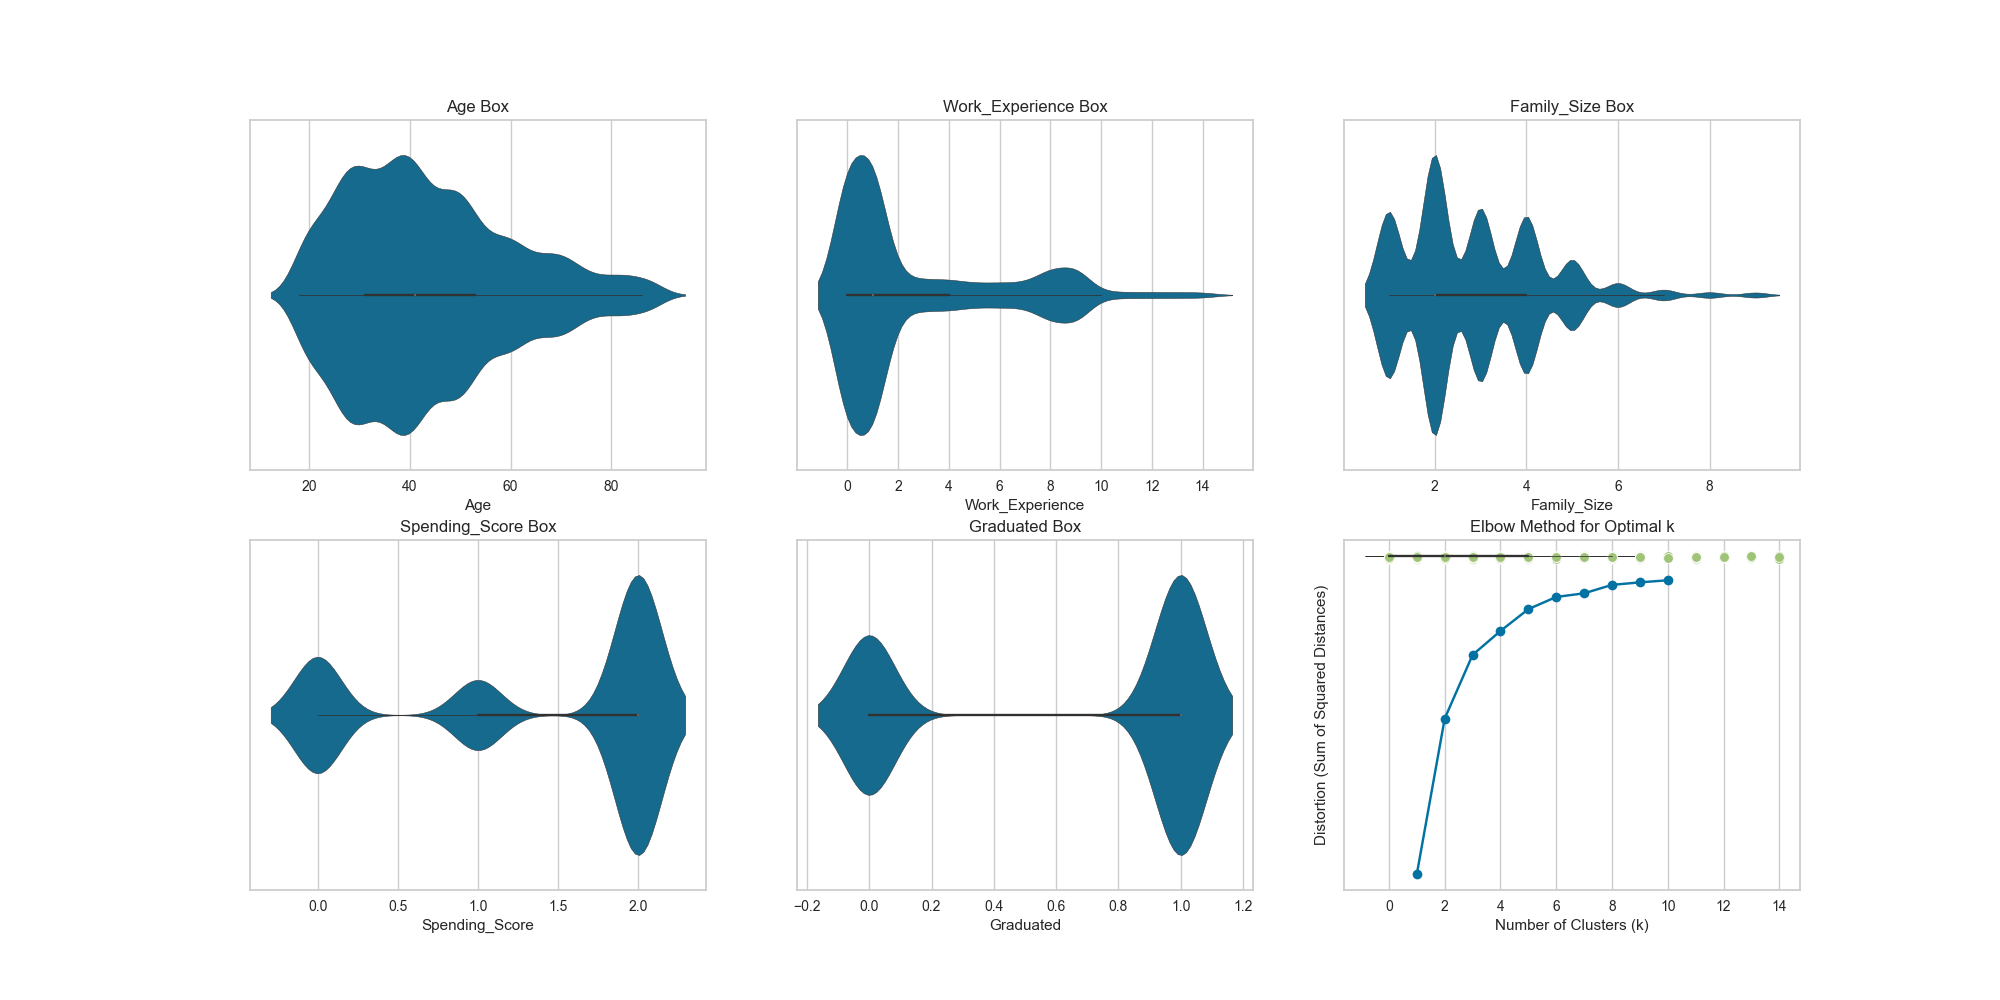

In [80]:
X1 = data.loc[: , ['Age', 'Profession']].values
X1_ = data_copy.loc[: , ['Age', 'Family_Size']].values
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X1)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


- Plotting the Silhouette curve to determing the value of K through Silhouette score.
- Silhouette Score:
    - The Silhouette Score is a metric that measures how well-defined the clusters are in a dataset. It ranges from -1 to 1, where a high value indicates well-separated clusters. The silhouette score for each data point is calculated based on the average distance to points in the same cluster (a) and the average distance to points in the nearest cluster (b). The overall silhouette score is the average of silhouette scores for all data points.

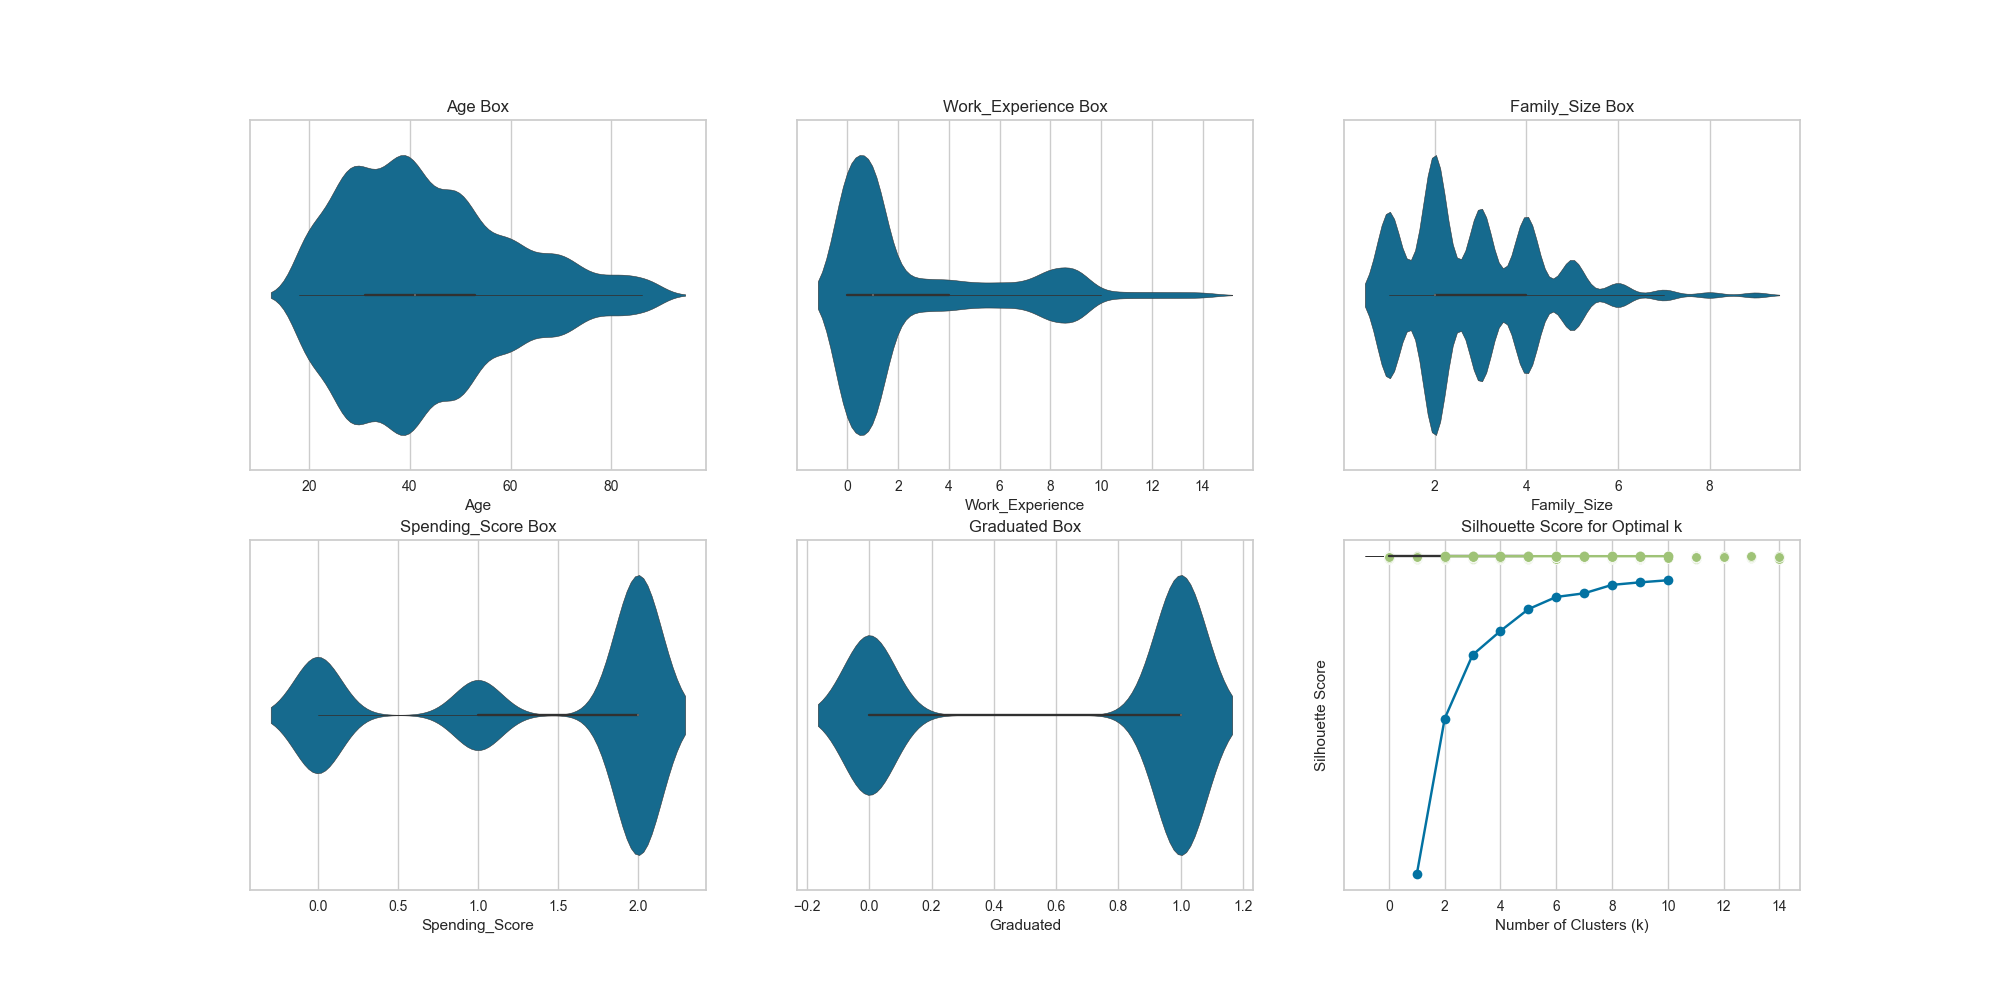

In [81]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X1)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X1, labels))

# Plot Silhouette Scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


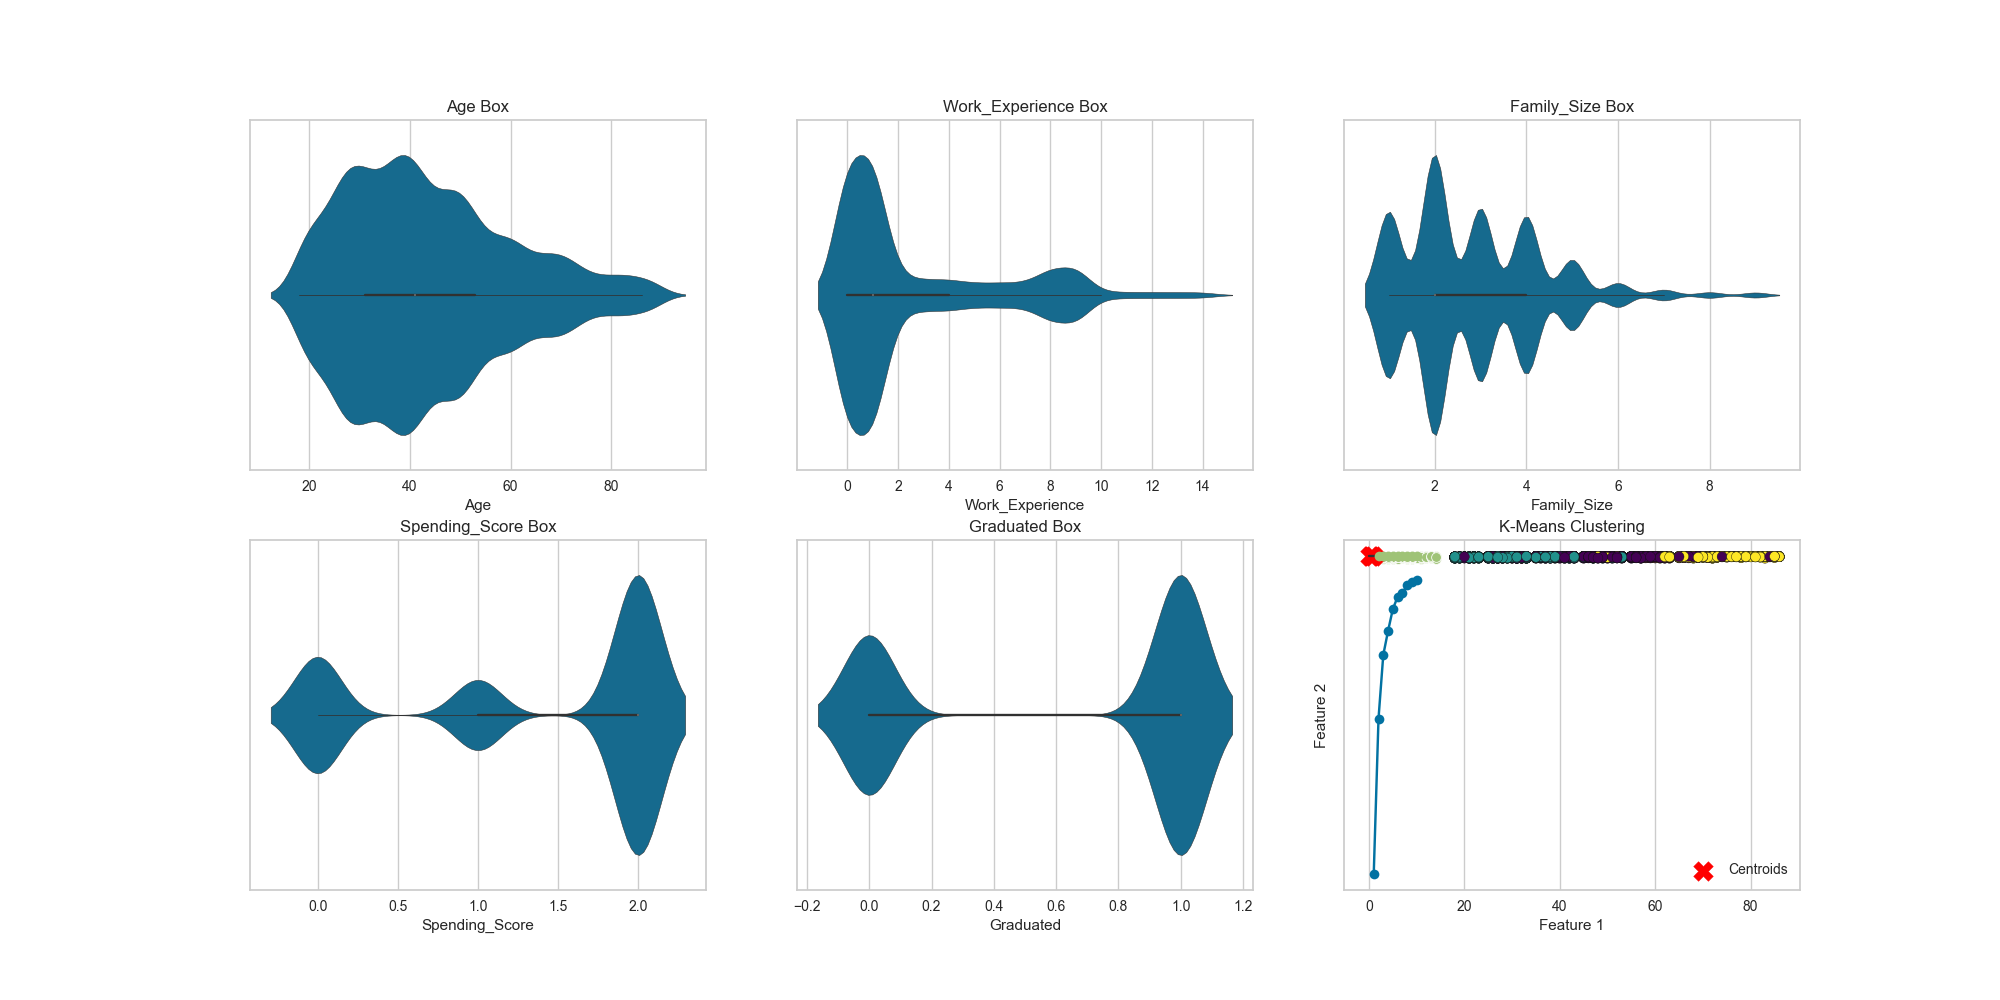

In [82]:

optimal_k = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
clusters = kmeans.fit_predict(X1)

# Visualize the clusters
plt.scatter(X1_[:, 0], X1_[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


This plot might seems wrong coz it looks like the points are overlapping but i also ploted the 3d graph to visualize clusters formed by 3 feature , that will make you understand this better.

In [83]:
data.head()

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,462809,Male,0,0.058824,0.0,0.625,0.1,1.0,0.500000
1,2,466315,Female,1,0.720588,1.0,0.250,0.1,1.0,0.000000
2,3,461735,Male,1,0.720588,1.0,0.875,0.0,0.5,0.166667
3,5,461319,Male,1,0.558824,0.0,0.000,0.0,0.0,0.166667
4,6,460156,Male,0,0.205882,1.0,0.625,0.1,1.0,0.333333


### Visualizing clusters formed by three features (3D representation)

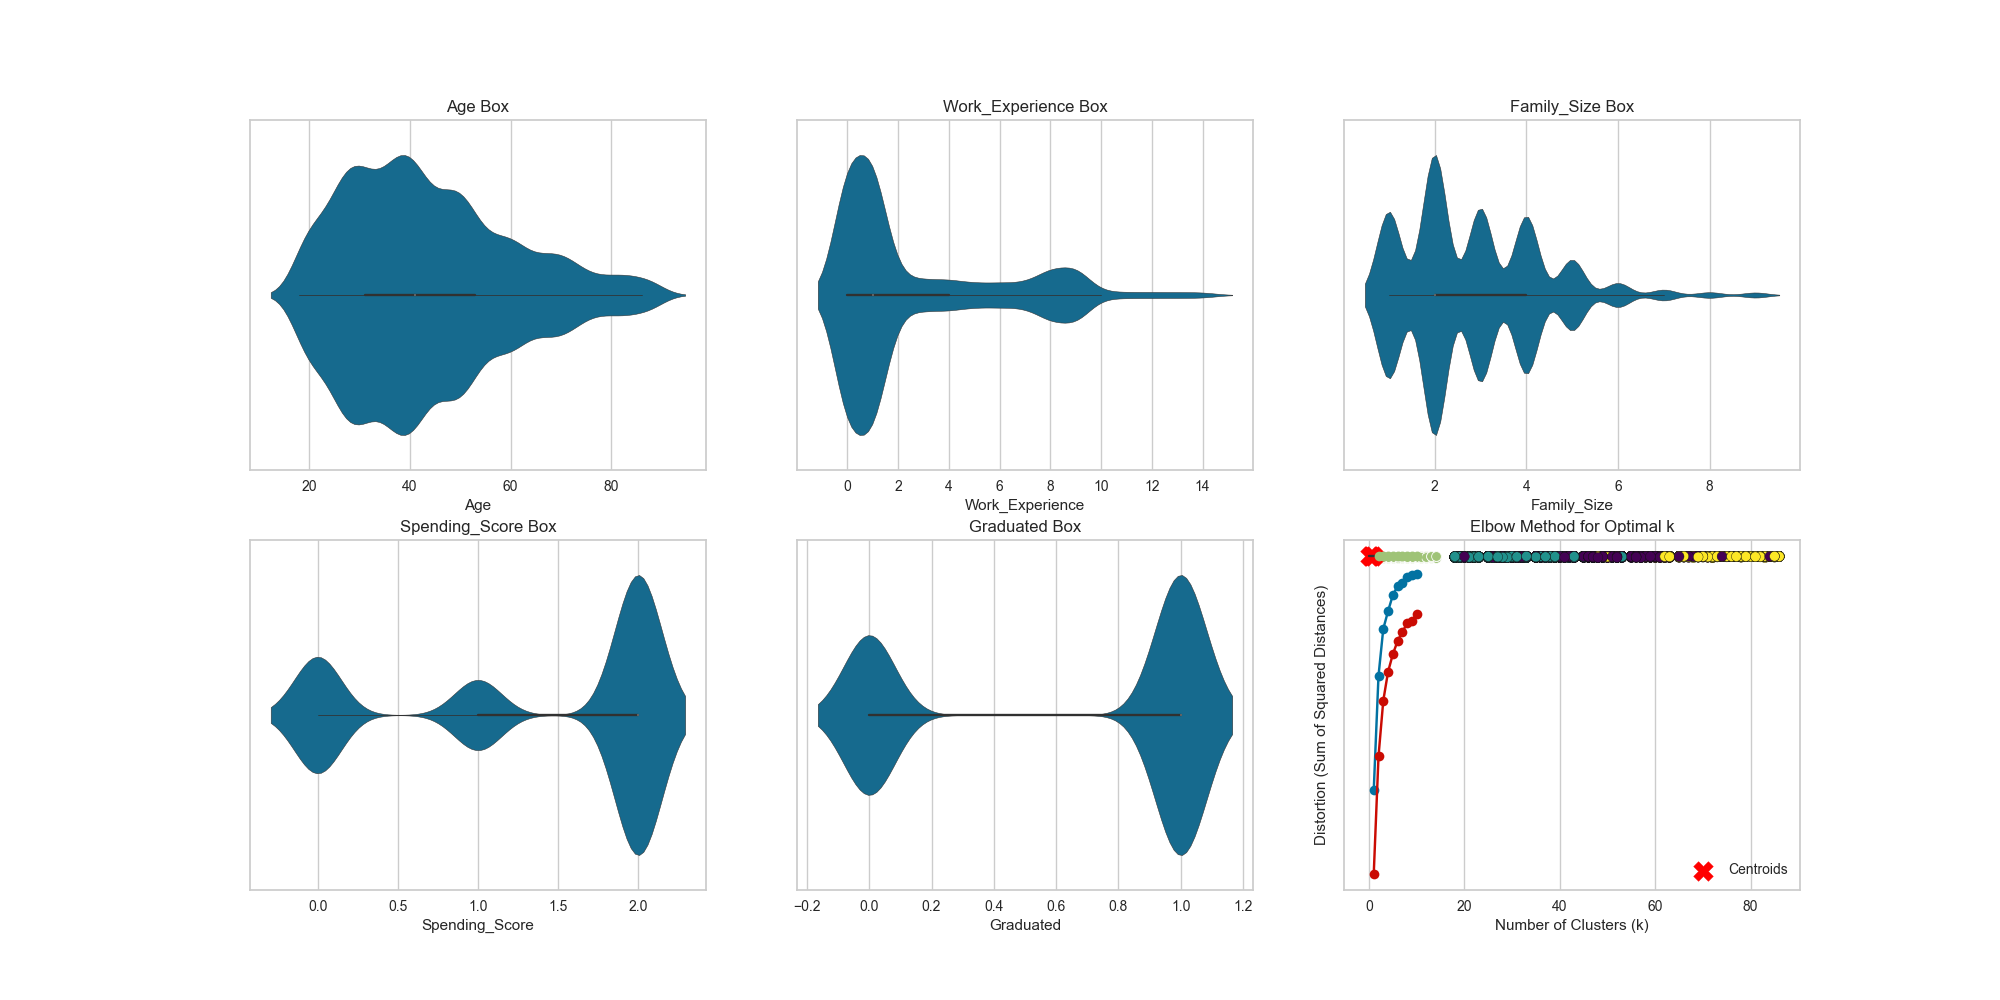

In [84]:
X2 = data.loc[: , ['Age', 'Profession','Family_Size']].values
X2_ = data_copy.loc[: , ['Age', 'Profession','Family_Size']].values
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X2)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


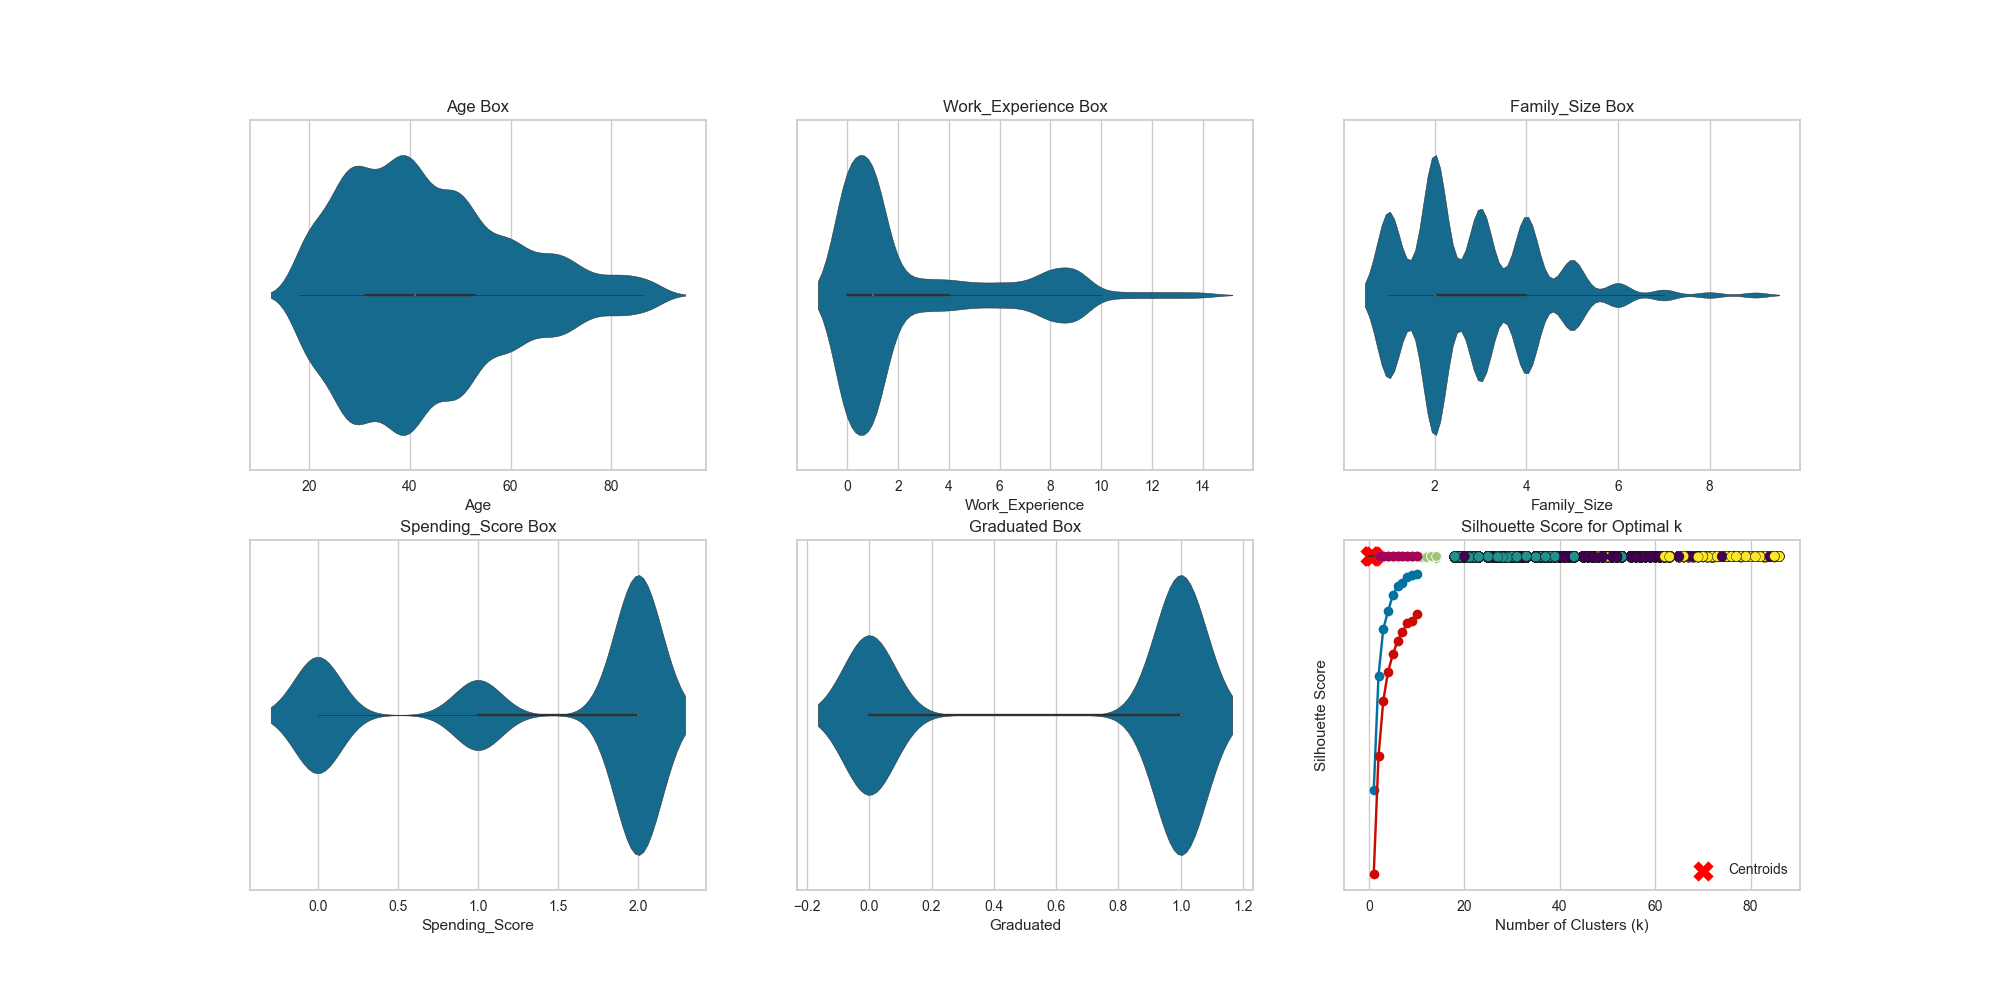

In [85]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X2, labels))

# Plot Silhouette Scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


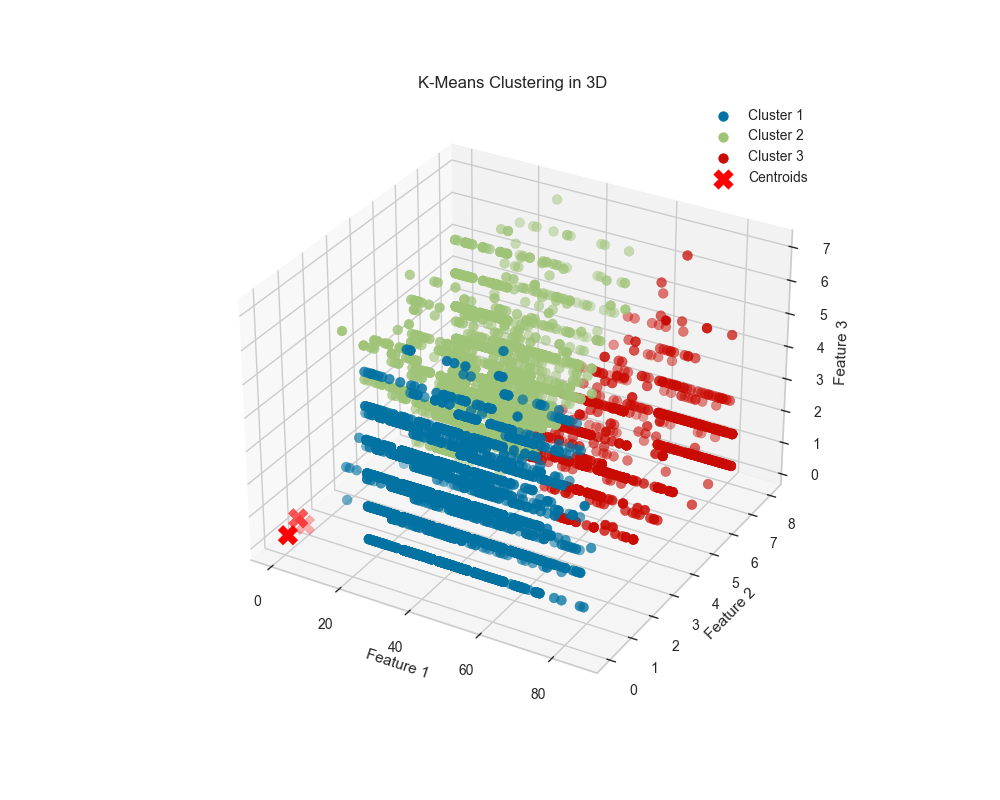

In [86]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
clusters = kmeans.fit_predict(X2)

%matplotlib ipympl
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(optimal_k):
    cluster_points = X2_[clusters == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               label=f'Cluster {cluster_label + 1}', s=50)

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering in 3D')
ax.legend()
plt.show()


In [87]:
plt.close('all')

No such comm: 34703c06b3dd48b2905fc9874e0413c9

No such comm: 34703c06b3dd48b2905fc9874e0413c9

No such comm: 34703c06b3dd48b2905fc9874e0413c9

No such comm: 34703c06b3dd48b2905fc9874e0413c9


Making final prediction and clustures on all the features we choose.

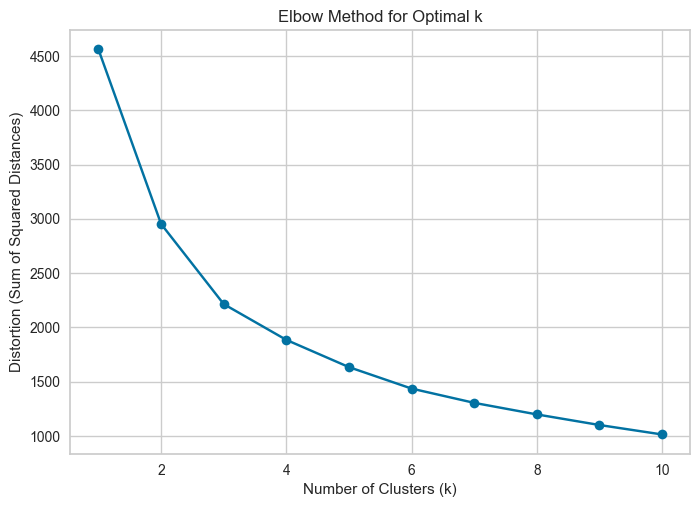

In [88]:
# fig2 = plt.figure(figsize=(10, 5))
%matplotlib inline
# X3 Containing the values of on which the clusturing will be done
X3 = data.loc[: , X].values
X3_ = data_copy.loc[: , X].values
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(X3)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


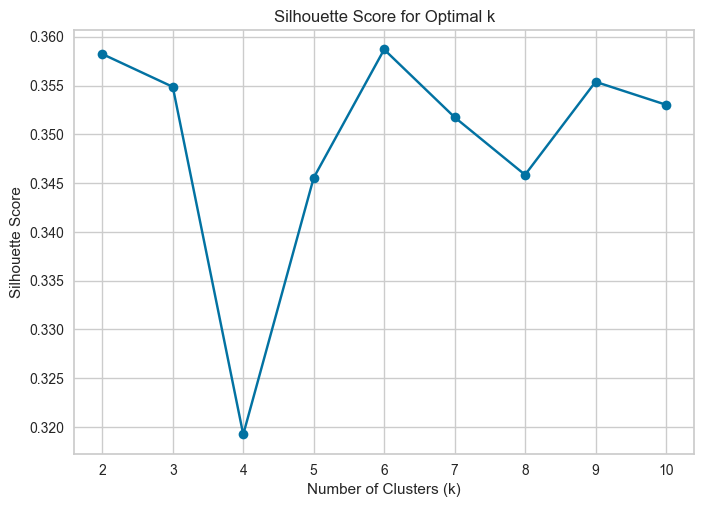

In [89]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X3)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X3, labels))

# Plot Silhouette Scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


### From the above Observation we can take the number of cluster as 6.

In [90]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
cluster_labels = kmeans.fit_predict(X3)

# Access the centroid coordinates
centroids = kmeans.cluster_centers_

print("Cluster Labels:\n", cluster_labels)
print("\nCentroids:\n", centroids)

data_copy['Cluster_Label'] = cluster_labels

Cluster Labels:

 [3 4 5 ... 5 5 2]



Centroids:

 [[3.00112955e-01 7.76070901e-01 2.16149680e-01 9.27621861e-01

  1.00000000e+00 2.78249631e-01]

 [4.83113069e-01 2.14831131e-01 3.69799315e-01 2.19530103e-01

  4.44089210e-16 3.99779736e-01]

 [4.48971108e-01 2.07703180e-01 3.31095406e-01 6.21908127e-02

  1.00000000e+00 1.13780919e-01]

 [2.10502905e-01 2.27098765e-01 3.72222222e-01 9.97839506e-01

  4.44089210e-16 4.85262346e-01]

 [3.78260325e-01 8.97872340e-02 1.79574468e-01 9.94893617e-01

  1.00000000e+00 1.12553191e-01]

 [5.15707743e-01 1.01216545e-01 2.83049473e-01 7.81630170e-01

  1.00000000e+00 7.07268856e-01]]


In [91]:
cluster_labels[:100]

array([3, 4, 5, 1, 5, 5, 4, 2, 4, 3, 3, 3, 3, 3, 2, 2, 3, 0, 1, 2, 4, 3,
       4, 3, 3, 1, 5, 3, 1, 0, 4, 3, 4, 3, 2, 3, 4, 1, 2, 4, 2, 3, 0, 2,
       2, 2, 5, 5, 5, 4, 2, 3, 2, 0, 2, 1, 3, 2, 3, 4, 3, 2, 3, 3, 0, 1,
       3, 3, 2, 0, 3, 1, 4, 2, 2, 3, 3, 4, 2, 2, 1, 2, 1, 3, 1, 0, 3, 5,
       3, 3, 4, 4, 5, 1, 3, 4, 4, 5, 1, 1])

In [92]:
data_copy.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster_Label
0,462809,Male,0,22,0,5,1.0,2,4.0,3
2,466315,Female,1,67,1,2,1.0,2,1.0,4
3,461735,Male,1,67,1,7,0.0,1,2.0,5
5,461319,Male,1,56,0,0,0.0,0,2.0,1
6,460156,Male,0,32,1,5,1.0,2,3.0,5
7,464347,Female,0,33,1,5,1.0,2,3.0,5
8,465015,Female,1,61,1,2,0.0,2,3.0,4
9,465176,Female,1,55,1,0,1.0,0,4.0,2
10,464041,Female,0,26,1,2,1.0,2,3.0,4
11,464942,Male,0,19,0,5,4.0,2,4.0,3
